In [1]:
import sqlite3
import os
import random
import numpy as np
import cupy as cp
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
from scipy import interp
from itertools import cycle
from keras.models import load_model
from tensorflow.keras import models
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc

# Architecture Comparison

In [2]:
alexnet = pd.read_json('alexnet_history.json')
lenet = pd.read_json('lenet_history.json')
densenet = pd.read_json('densenet_history.json')
vgg16 = pd.read_json('VGG16.json')
resnet = pd.read_json('resnet_history.json')

In [3]:
alex_acc = alexnet['accuracy']
le_acc = lenet['accuracy']
dense_acc = densenet['accuracy']
res_acc = resnet['accuracy']
vgg16_acc = vgg16['accuracy']

alex_val_acc = alexnet['val_accuracy']
le_val_acc = lenet['val_accuracy']
dense_val_acc = densenet['val_accuracy']
res_val_acc = resnet['val_accuracy']
vgg16_val_acc = vgg16['val_accuracy']

alex_loss = alexnet['loss']
le_loss = lenet['loss']
dense_loss = densenet['loss']
res_loss = resnet['loss']
vgg16_loss = vgg16['loss']

alex_val_loss = alexnet['val_loss']
le_val_loss = lenet['val_loss']
dense_val_loss = densenet['val_loss']
res_val_loss = resnet['val_loss']
vgg16_val_loss = vgg16['val_loss']


In [4]:
accuracies = {'Model' : ['AlexNet', 'LeNet', 'DenseNet', 'ResNet', 'VGG16'],
        'Training': [max(alex_acc), max(le_acc), max(dense_acc), max(res_acc), max(vgg16_acc)],
        'Validation': [max(alex_val_acc), max(le_val_acc), max(dense_val_acc), max(res_val_acc), max(vgg16_val_acc)]
       }
df = pd.DataFrame(accuracies, columns = ['Model', 'Training', 'Validation'])

print (df)

      Model  Training  Validation
0   AlexNet  0.987706    0.988921
1     LeNet  0.989974    0.976879
2  DenseNet  0.892337    0.811657
3    ResNet  0.788255    0.750482
4     VGG16  0.771664    0.750482


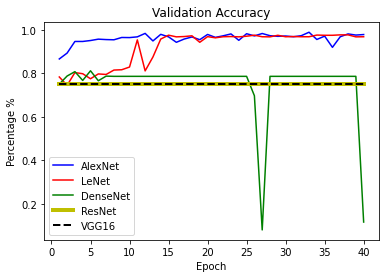

In [5]:
epochs = range(1, 40 + 1)
itera = 40
plt.plot(epochs, alex_val_acc[:itera], 'b', label='AlexNet')
plt.plot(epochs, le_val_acc[:itera], 'r', label='LeNet')
plt.plot(epochs, dense_val_acc[:itera], 'g', label='DenseNet')
plt.plot(epochs, res_val_acc[:itera], 'y',label='ResNet', linewidth=4)
plt.plot(epochs, vgg16_val_acc[:itera], 'k--', label='VGG16', linewidth=2)
plt.title('Validation Accuracy')
plt.ylabel('Percentage %')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('ValAccModel')

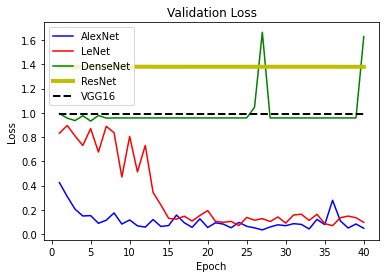

In [87]:
epochs = range(1, 40 + 1)
itera = 40
plt.plot(epochs, alex_val_loss[:itera], 'b', label='AlexNet')
plt.plot(epochs, le_val_loss[:itera], 'r',label='LeNet')
plt.plot(epochs, dense_val_loss[:itera], 'g', label='DenseNet')
plt.plot(epochs, res_val_loss[:itera], 'y',label='ResNet', linewidth=4)
plt.plot(epochs, vgg16_val_loss[:itera], 'k--', label='VGG16', linewidth=2)
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('LossFuncModel')

# Filter Comparison

In [2]:
alexnet = pd.read_json('alexnet_history.json')
alexnet_half = pd.read_json('alexnt_half_history.json')
alexnet_double = pd.read_json('alexnt_double_history.json')

In [3]:
full_acc = alexnet['accuracy']
half_acc = alexnet_half['accuracy']
double_acc = alexnet_double['accuracy']


full_val_acc = alexnet['val_accuracy']
half_val_acc = alexnet_half['val_accuracy']
double_val_acc = alexnet_double['val_accuracy']


full_loss = alexnet['loss']
half_loss = alexnet_half['loss']
double_loss = alexnet_double['loss']

full_val_loss = alexnet['val_loss']
half_val_loss = alexnet_half['val_loss']
double_val_loss = alexnet_double['val_loss']


In [4]:
accuracies = {'Model' : ['Full', 'Half', 'Double'],
        'Training': [max(full_acc), max(half_acc), max(double_acc)],
        'Validation': [max(full_val_acc), max(half_val_acc), max(double_val_acc)]
       }
df = pd.DataFrame(accuracies, columns = ['Model', 'Training', 'Validation'])

print (df)

    Model  Training  Validation
0    Full  0.987706    0.988921
1    Half  0.788255    0.750482
2  Double  0.788255    0.750482


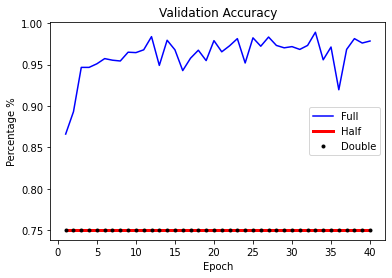

In [15]:
epochs = range(1, 40 + 1)
itera = 40
plt.plot(epochs, full_val_acc[:itera], 'b', label='Full')
plt.plot(epochs, half_val_acc[:itera], 'r', label='Half', linewidth = 3)
plt.plot(epochs, double_val_acc[:itera], 'k.', label='Double')
plt.title('Validation Accuracy')
plt.ylabel('Percentage %')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('FilValAccModel')

# activation Comparison

In [9]:
alexnet = pd.read_json('alexnet_history.json')
alexnet_tanh = pd.read_json('alexnt_tanh_history.json')
alexnet_sigmoid = pd.read_json('alexnt_sigmoid_history.json')

In [10]:
relu_acc = alexnet['accuracy']
tanh_acc = alexnet_tanh['accuracy']
sigmoid_acc = alexnet_sigmoid['accuracy']


relu_val_acc = alexnet['val_accuracy']
tanh_val_acc = alexnet_tanh['val_accuracy']
sigmoid_val_acc = alexnet_sigmoid['val_accuracy']


relu_loss = alexnet['loss']
tanh_loss = alexnet_tanh['loss']
sigmoid_loss = alexnet_sigmoid['loss']

relu_val_loss = alexnet['val_loss']
tanh_val_loss = alexnet_tanh['val_loss']
sigmoid_val_loss = alexnet_sigmoid['val_loss']


In [11]:
accuracies = {'Model' : ['ReLu', 'tanh', 'sigmoid'],
        'Training': [max(relu_acc), max(tanh_acc), max(sigmoid_acc)],
        'Validation': [max(relu_val_acc), max(tanh_val_acc), max(sigmoid_val_acc)]
       }
df = pd.DataFrame(accuracies, columns = ['Model', 'Training', 'Validation'])

print (df)

     Model  Training  Validation
0     ReLu  0.987706    0.988921
1     tanh  0.788255    0.750482
2  sigmoid  0.788255    0.750482


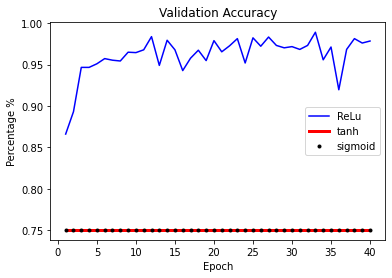

In [16]:
epochs = range(1, 40 + 1)
itera = 40
plt.plot(epochs, relu_val_acc[:itera], 'b', label='ReLu')
plt.plot(epochs, tanh_val_acc[:itera], 'r', label='tanh', linewidth=3)
plt.plot(epochs, sigmoid_val_acc[:itera], 'k.', label='sigmoid')
plt.title('Validation Accuracy')
plt.ylabel('Percentage %')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('ActValAccModel')

# Optimizer Comparison

In [21]:
alexnet_Adam = pd.read_json('alexnet_history.json')
alexnet_adadelta = pd.read_json('alexnt_Adadelta_history.json')
alexnet_SGD = pd.read_json('alexnt_SGD_history.json')
alexnet_RMSProp = pd.read_json('alexnt_RMSprop_history.json')

In [22]:
adam_acc = alexnet_Adam['accuracy']
adadelta_acc = alexnet_adadelta['accuracy']
SGD_acc = alexnet_SGD['accuracy']
RMSProp_acc = alexnet_RMSProp['accuracy']

adam_val_acc = alexnet_Adam['val_accuracy']
adadelta_val_acc = alexnet_adadelta['val_accuracy']
SGD_val_acc = alexnet_SGD['val_accuracy']
RMSProp_val_acc = alexnet_RMSProp['val_accuracy']

adam_loss = alexnet_Adam['loss']
adadelta_loss = alexnet_adadelta['loss']
SGD_loss = alexnet_SGD['loss']
RMSProp_loss = alexnet_RMSProp['loss']

adam_val_loss = alexnet_Adam['val_loss']
adadelta_val_loss = alexnet_adadelta['val_loss']
SGD_val_loss = alexnet_SGD['val_loss']
RMSProp_val_loss = alexnet_RMSProp['val_loss']


In [23]:
accuracies = {'Model' : ['Adam', 'Adadelta', 'SGD', 'RMSProp'],
        'Training': [max(adam_acc), max(adadelta_acc), max(SGD_acc), max(RMSProp_acc)],
        'Validation': [max(adam_val_acc), max(adadelta_val_acc), max(SGD_val_acc), max(RMSProp_val_acc)]
       }
df = pd.DataFrame(accuracies, columns = ['Model', 'Training', 'Validation'])

print (df)

      Model  Training  Validation
0      Adam  0.987706    0.988921
1  Adadelta  0.864526    0.799615
2       SGD  0.904154    0.868497
3   RMSProp  0.958940    0.978324


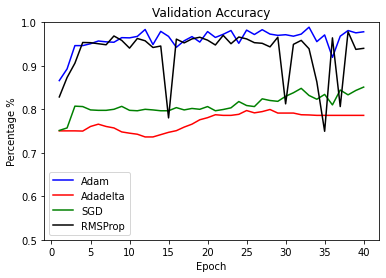

In [25]:
epochs = range(1, 40 + 1)
itera = 40
plt.plot(epochs, adam_val_acc[:itera], 'b', label='Adam')
plt.plot(epochs, adadelta_val_acc[:itera], 'r', label='Adadelta')
plt.plot(epochs, SGD_val_acc[:itera], 'g', label='SGD')
plt.plot(epochs, RMSProp_val_acc[:itera], 'k',label='RMSProp')
plt.title('Validation Accuracy')
plt.ylabel('Percentage %')
plt.xlabel('Epoch')
plt.ylim([0.5, 1])
plt.legend()
plt.savefig('OptValAccModel')

# Model Assessment

In [2]:
X_train = np.load('gears_train_300x400_0,76,77,35.npy')
X_test = np.load('gears_test_300x400_0,76,77,35.npy')
y_train = np.load('gears_ytrain_300x400_0,76,77,35.npy')
y_test = np.load('gears_ytest_300x400_0,76,77,35.npy')

In [14]:
gear_defects = [0, 35, 76, 77]

In [3]:
model = load_model("alexnet.h5")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [4]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

65/65 - 1s - loss: 0.0426 - accuracy: 0.9889

Test accuracy: 0.9889209866523743


In [5]:
# Show metrics
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       166
           1       0.99      0.99      0.99       198
           2       1.00      0.99      0.99      1558
           3       0.98      1.00      0.99       154

    accuracy                           0.99      2076
   macro avg       0.97      0.99      0.98      2076
weighted avg       0.99      0.99      0.99      2076



In [7]:
history = pd.read_json('alexnet_history.json')

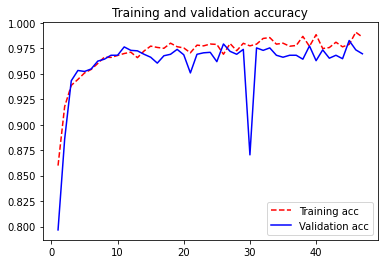

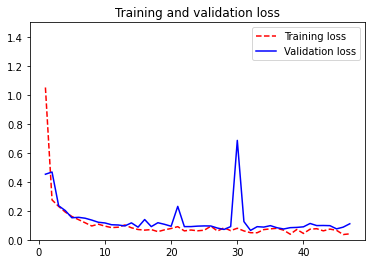

In [9]:
# Plot train and test validation of loss values and accuracy values
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim([0,1.5])
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
# ROC binary label reshaping
y_pred_roc = (y_pred[:,None] == np.arange(y_pred.max()+1)).astype(int)
y_test_roc = (y_test[:,None] == np.arange(y_test.max()+1)).astype(int)

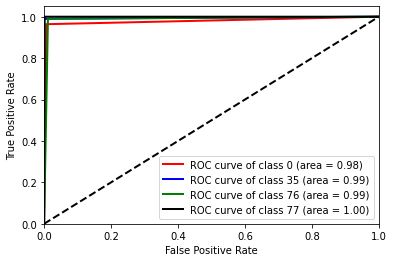

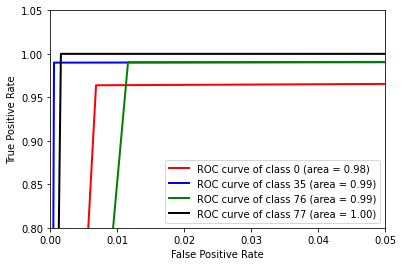

In [15]:
# Plot ROC
def plot_roc(y_test, y_pred):
    # Plot linewidth.
    lw = 2
    n_classes = len(y_pred_roc[0])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot all ROC curves
    plt.figure(1)

    colors = cycle(['red', 'blue', 'green', 'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class '+str(gear_defects[i])+' (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig('ROC')
    plt.show()
    
    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, 0.05)
    plt.ylim(0.8, 1.05)
    colors = cycle(['red', 'blue', 'green', 'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class '+str(gear_defects[i])+' (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig('ROC_zoom')
    plt.show()
    
plot_roc(y_test_roc,y_pred_roc)

<AxesSubplot:>

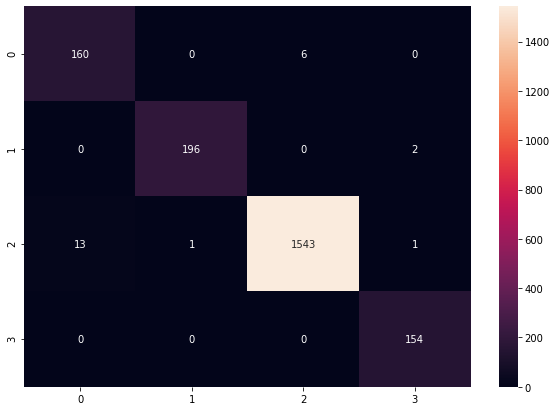

In [16]:
matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix, index = [i for i in range(len(np.unique(y_test)))],
                  columns = [i for i in range(len(np.unique(y_test)))])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')